## Gradients and Colors

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2

### Gradients
Applying the **Sobel operator** to an image is a way of taking the derivative of the image in the *x or y* direction. 

**Direction of the Gradient** The direction of the gradient is the inverse tangent (arctangent) of the y gradient divided by the x gradient: arctan(sobely/sobelx).   

Orientation 0 is taken to mean that the direction of maximum contrast from black to white runs from left to right on the image (vertical line), and other angles are measured anti-clockwise from this.

Each pixel of the resulting image contains a value for the angle of the gradient away from horizontal in units of radians, covering a range of -\pi/2 −π/2 to \pi/2 π/2. An orientation of 0 implies a vertical line and orientations of \footnotesize{+/-}\:\normalsize{\pi/2} +/−π/2 imply horizontal lines. (Note that in the quiz below, we actually utilize np.arctan2, which can return values between \footnotesize{+/-}\:\normalsize{\pi} +/−π; however, as we'll take the absolute value of sobel_xsobel 
x
​	 , this restricts the values to \footnotesize{+/-}\:\normalsize{\pi/2} +/−π/2, as shown here.)

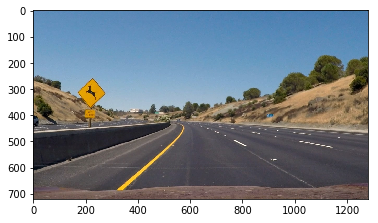

In [2]:
image = mpimg.imread('./test_images/test2.jpg')
plt.imshow(image)

Text(0.5,1,'sobel+magnitude+dir')

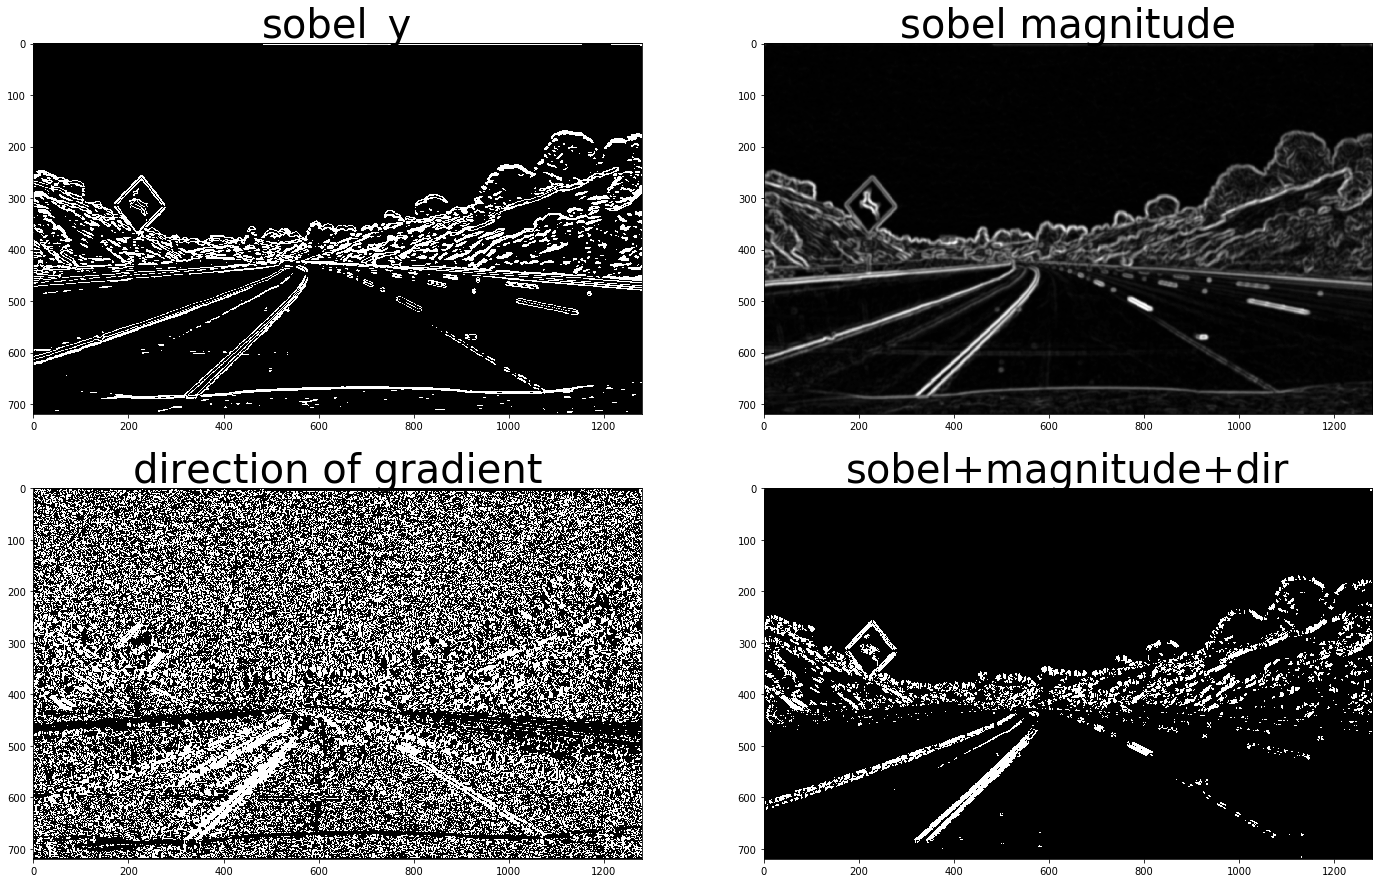

In [14]:
    # Grayscale
    # Gaussian blur
    # Apply cv2.Sobel()
    # Take the absolute value of the output from cv2.Sobel()
    # Scale the result to an 8-bit range (0-255)
    # Apply lower and upper thresholds
    # Create binary_output
gray = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
# Define a kernel size for Gaussian smoothing / blurring
kernel_size = 3 # Must be an odd number (3, 5, 7...)
blur_gray = cv2.GaussianBlur(gray,(kernel_size, kernel_size),0)

#sobelx
sobel_kernel=15
sobelx = cv2.Sobel(blur_gray, cv2.CV_64F, 1, 0,ksize=sobel_kernel)
abs_sobelx = np.absolute(sobelx)

#sobely
sobely = cv2.Sobel(blur_gray, cv2.CV_64F, 0, 1,ksize=sobel_kernel)
abs_sobely = np.absolute(sobely)

#sobel scaled and binary
scaled_abs_sobelx = np.uint8(255*abs_sobelx/np.max(abs_sobelx))
scaled_abs_sobely = np.uint8(255*abs_sobely/np.max(abs_sobely))
gradx_binary = np.zeros_like(scaled_abs_sobelx)
grady_binary = np.zeros_like(scaled_abs_sobely)
sobel_thresh = (30,100)
gradx_binary[(scaled_abs_sobelx >= sobel_thresh[0]) & (scaled_abs_sobelx <= sobel_thresh[1])] = 1
grady_binary[(scaled_abs_sobely >= sobel_thresh[0]) & (scaled_abs_sobely <= sobel_thresh[1])] = 1


# magnitude of sobelx and sobely
absmag = abs_sobelx + abs_sobely #gradmag = np.sqrt(sobelx**2 + sobely**2) # is slower
scale_factor = np.max(absmag)/255 # Rescale to 8 bit (0-255)
scaled_absmag = (cv2.GaussianBlur(absmag,(9, 9),0)/scale_factor).astype(np.uint8)
mag_binary = np.zeros_like(scaled_absmag)
mag_thresh = (30, 200)
mag_binary[(scaled_absmag >= mag_thresh[0]) & (scaled_absmag <= mag_thresh[1])] = 1

#direction of the gradient
thresh=(0.7, 1.3)
absgraddir = np.arctan2(np.absolute(sobely), np.absolute(sobelx))
dir_binary =  np.zeros_like(absgraddir)
dir_binary[(absgraddir >= thresh[0]) & (absgraddir <= thresh[1])] = 1

#combining sobelx,sobely,magnitude,direction thresholds
combined_output = np.zeros_like(dir_binary)
combined_output[((gradx_binary == 1) & (grady_binary == 1)) | ((mag_binary == 1) & (dir_binary == 1))] = 1

# plot results
f, axes = plt.subplots(2, 2, figsize=(24, 15))
axes[0,0].imshow(grady_binary,cmap='Greys_r',aspect='auto')
axes[0,0].set_title('sobel_y',fontsize=40)
axes[0,1].imshow(scaled_absmag,cmap='Greys_r',aspect='auto')
axes[0,1].set_title('sobel magnitude',fontsize=40)
axes[1,0].imshow(dir_binary,cmap='Greys_r',aspect='auto')
axes[1,0].set_title('direction of gradient',fontsize=40)
axes[1,1].imshow(combined_output,cmap='Greys_r',aspect='auto')
axes[1,1].set_title('sobel+magnitude+dir',fontsize=40)

### Color Spaces
Converting our images to grayscale results in the loss of valuable color information. We can use various color spaces to get the most out of our images.    

A color space is a specific organization of colors; color spaces provide a way to categorize colors and represent them in digital images.    

RGB is red-green-blue color space. You can think of this as a 3D space, in this case a cube, where any color can be represented by a 3D coordinate of R, G, and B values. For example, white has the coordinate (255, 255, 255), which has the maximum value for red, green, and blue.

**Note**: *If you read in an image using matplotlib.image.imread() you will get an RGB image, but if you read it in using OpenCV cv2.imread() this will give you a BGR image.*

There is also **HSV** color space (hue, saturation, and value), and **HLS** space (hue, lightness, and saturation). These are some of the most commonly used color spaces in image analysis. To get some intuition about these color spaces, you can generally think of **Hue** as the value that represents color independent of any change in brightness. So if you imagine a basic red paint color, then add some white to it or some black to make that color lighter or darker -- the underlying color remains the same and the hue for all of these colors will be the same.

On the other hand, **Lightness** and **Value** represent different ways to measure the relative lightness or darkness of a color. For example, a dark red will have a similar hue but much lower value for lightness than a light red. **Saturation** also plays a part in this; saturation is a measurement of colorfulness. So, as colors get lighter and closer to white, they have a lower saturation value, whereas colors that are the most intense, like a bright primary color (imagine a bright red, blue, or yellow), have a high saturation value. 

Most of these different color spaces were either inspired by the human vision system, and/or developed for efficient use in television screen displays and computer graphics. 

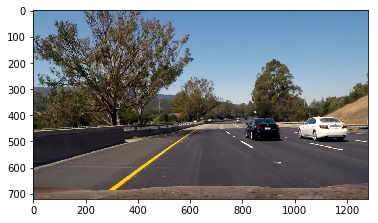

In [2]:
# Read in an image
image = mpimg.imread('./test_images/test6.jpg')
plt.imshow(image)

In [14]:
# Define a function that thresholds the S-channel of HLS
# Use exclusive lower bound (>) and inclusive upper (<=)
def hls_select(img, thresh=(90, 255)):
    hls = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)
    H = hls[:,:,0]
    L = hls[:,:,1]
    S = hls[:,:,2]
    binary = np.zeros_like(S)
    binary[(S > thresh[0]) & (S <= thresh[1])] = 1
    return binary, H, L, S

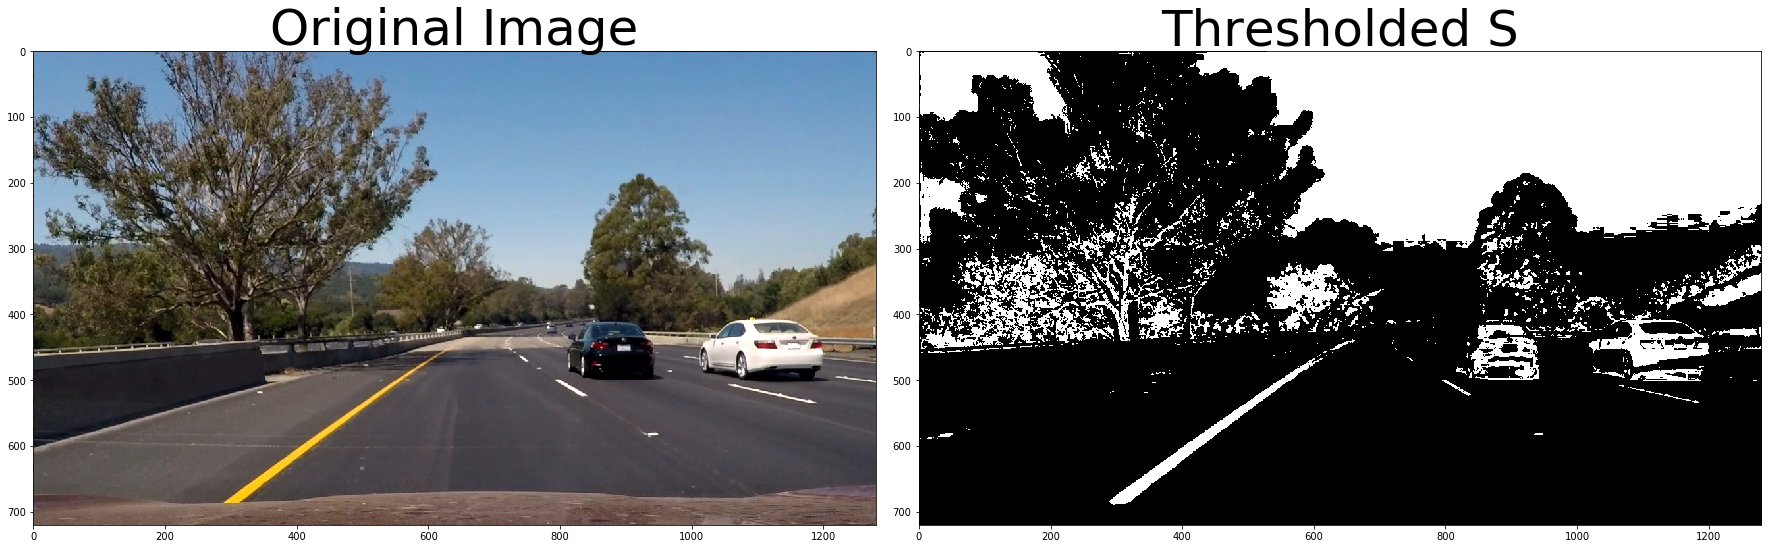

In [16]:
hls_binary, H, L, S = hls_select(image, thresh=(90, 255))

# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(image)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(hls_binary, cmap='gray')
ax2.set_title('Thresholded S', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

Text(0.5,1,'S')

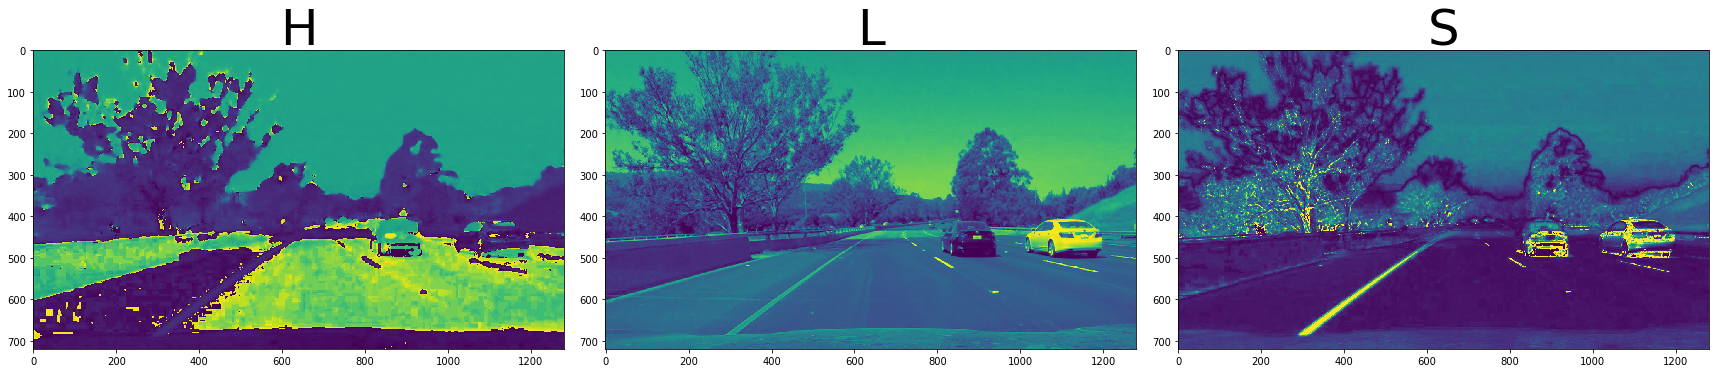

In [11]:
# Plot the individual HLS components
f, (ax1, ax2,ax3) = plt.subplots(1, 3, figsize=(24, 9))
f.tight_layout()
ax1.imshow(H)
ax1.set_title('H', fontsize=50)
ax2.imshow(L)
ax2.set_title('L', fontsize=50)
ax3.imshow(S)
ax3.set_title('S', fontsize=50)

### Gradients + Color Spaces
You can clearly see which parts of the lane lines were detected by the gradient threshold and which parts were detected by the color threshold by stacking the channels and seeing the individual components. You can create a binary combination of these two images to map out where either the color or gradient thresholds were met.

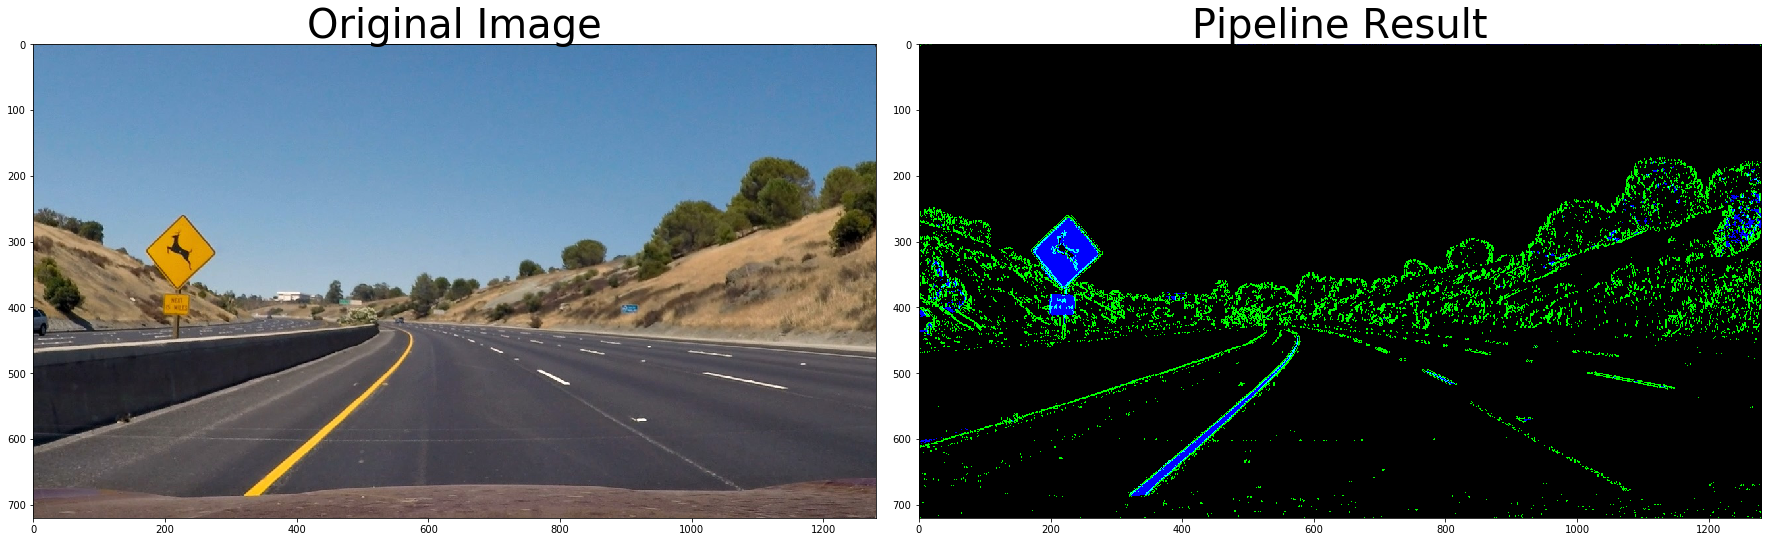

In [5]:
image = mpimg.imread('./test_images/test2.jpg')

def pipeline(img, s_thresh=(170, 255), sx_thresh=(20, 100)):
    img = np.copy(img)
    # Convert to HLS color space and separate the channels
    hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
    l_channel = hls[:,:,1]
    s_channel = hls[:,:,2]
    # Sobel x
    sobelx = cv2.Sobel(l_channel, cv2.CV_64F, 1, 0) # Take the derivative in x
    abs_sobelx = np.absolute(sobelx) # Absolute x derivative to accentuate lines away from horizontal
    scaled_sobel = np.uint8(255*abs_sobelx/np.max(abs_sobelx))
    
    # Threshold x gradient
    sxbinary = np.zeros_like(scaled_sobel)
    sxbinary[(scaled_sobel >= sx_thresh[0]) & (scaled_sobel <= sx_thresh[1])] = 1
    
    # Threshold color channel
    s_binary = np.zeros_like(s_channel)
    s_binary[(s_channel >= s_thresh[0]) & (s_channel <= s_thresh[1])] = 1
    # Stack each channel
    color_binary = np.dstack(( np.zeros_like(sxbinary), sxbinary, s_binary)) * 255
    return color_binary
    
result = pipeline(image)

# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()

ax1.imshow(image)
ax1.set_title('Original Image', fontsize=40)

ax2.imshow(result)
ax2.set_title('Pipeline Result', fontsize=40)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

## References
https://www.youtube.com/watch?v=uihBwtPIBxM      
https://homepages.inf.ed.ac.uk/rbf/HIPR2/sobel.htm